# Support Vector Regression - SVR

**Support vector machines** es una generalización del algoritmo que vamos a ver aquí.

Este algoritmo es un algoritmo *supervisado*, que puede ser utilizado tanto para problemas de regresión como para problemas de *clasificación*, donde es mayormente usado. SVR utiliza los mismos principios que el SVM, con sólo unas pocas diferencias menores.

La idea es seleccionar un hiperplano de separación que equidiste de los ejemplos más cercanos de cada clase para, de esta forma, conseguir lo que se denomina un margen máximo a cada lado del hiperplano. Además, a la hora de definir el hiperplano, sólo se consideran los ejemplos de entrenamiento que distan del hiperplano la distancia margen. Estos ejemplos reciben el nombre de *vectores soporte*

El hiperplano que permite separar las dos clases no suele ser único. La selección de un hiperplano de entre todos los posibles hiperplanos de separación se realizará a partir del concepto de margen, que se define como la distancia mínima entre dicho hiperplano y el ejemplo más cercano a cada clase; se denotará por τ


![](img/SVR.png)


## Características

* SVR realiza la regresión lineal en un espacio dimensional mayor que el normal.
* Cada punto (dato) en el conjunto de entrenamiento está representado por su propia dimensión. Cuando evaluamos nuestro kernel entre el conjunto de entrenamiento y el conjunto de test, los resultados que obtenemos son las coordenadas de nuestros puntos (datos) test en dichas dimensiones.
* Este método ignora los valores *outliers*

* Requiere un conjunto de formación que cubra el dominio de interés y vaya acompañado de soluciones en ese dominio.

* El trabajo de SVM es aproximar la función que usamos para generar un conjunto de entrenamineto.

* En un problema de clasificación, nosotros usamos dichos vectores para definir un hiperplano que separe los diferentes casos de la solución. Esos vectores son usados para calcular la regresión lineal

## Regresión lineal y SVR

Una diferencia respecto a la regresión lineal, es que en una regresión lineal queremos minimizar el error cometido entre la predicción y los datos. En SVR nuestra meta es asegurarnos de que los errores no excedan un *threshold* o *límite*.

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

### Fit regression model

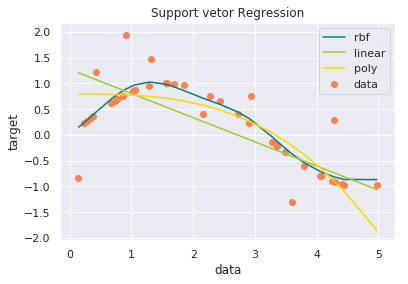

In [3]:
# class
from sklearn.svm import SVR

# Colours and kernels
colors = ['teal', 'yellowgreen', 'gold']
kernels = ['rbf', 'linear', 'poly']

# differents regressors
for count, kernel in enumerate(kernels):
    svr = SVR(kernel=kernel, C=1.0)
    y_pred = svr.fit(X, y).predict(X)
    
    plt.plot(X, y_pred,
             color=colors[count], label=kernels[count])
plt.scatter(X, y, color='coral', label='data')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support vetor Regression')
plt.legend()
plt.show()

In [4]:
del X, y, y_pred

### Comparación de resultados

Vamos utilizar los datos usados en el ejemplo de la regresión polinómica, para comparar si las métricas mejoran, al igual que el ajuste de las predicciones

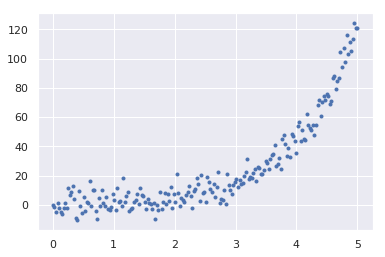

In [5]:
# Data
X = np.linspace(0, 5, 200)
res = 6.4 * np.random.randn(200)
y = res + 0.83 * np.exp(X)

# Data reshape
X_s = np.reshape(a=X, newshape=(-1, 1))
y_s = np.reshape(a=y, newshape=(-1, 1))

plt.plot(X_s, y_s,
         marker='.', linestyle='none')
plt.show()

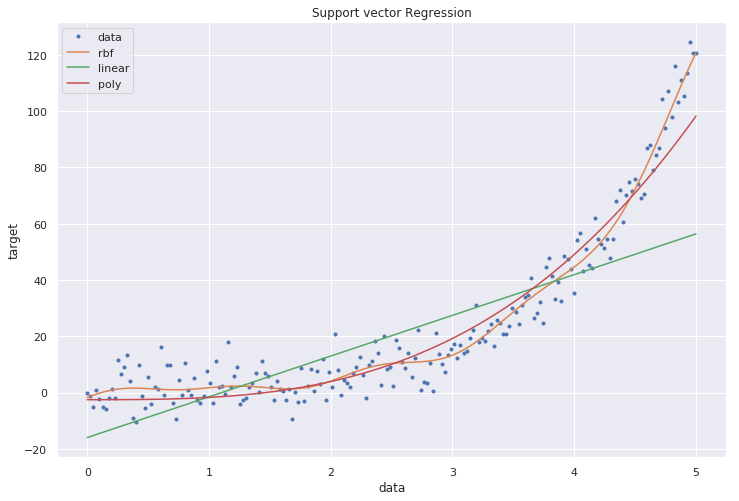

In [6]:
# Colores y kernels
#colors = ['#beaed4', '#fdc086', '#ffff99', '#386cb0']
kernels = ['rbf', 'linear', 'poly']

# Plot
plt.figure(figsize=(12,8))
plt.plot(X_s, y_s, marker='.', linestyle='none', label='data')

# regressors
svr = []
y_pred = np.empty(shape=(len(kernels), len(y)))

# differents regressors
for count, kernel in enumerate(kernels):
    svr.append(SVR(kernel=kernel, C=1e3))
    y_pred[count] = svr[count].fit(X_s, y).predict(X_s)
    
    plt.plot(X, y_pred[count],
             label=kernels[count])
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support vector Regression')
plt.legend()
plt.show()

### Métricas obtenidas

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
print("Kernels {:<11} {:<11}  {:<10}".format(" ", "MSE", "r2"))
for count, kernel in enumerate(kernels):
    MSE_poly = mean_squared_error(y_s, y_pred[count])
    r2_poly = r2_score(y_s, y_pred[count])
    print("Kernel: {:<10}  {:<10}  {:<10}".format(kernel,
                                  np.round(MSE_poly, 3),
                                  np.round(r2_poly, 2)))

Kernels             MSE          r2        
Kernel: rbf         34.515      0.96      
Kernel: linear      340.578     0.65      
Kernel: poly        69.603      0.93      



|   Regresión                  |MSE    |$r^{2}$|
|------------------------------|-------|-------|
|Regresión lineal              |274.536| 0.72  |
|Regresión polinómica (grado 4)|33.67  | 0.97  |
|Regresión SVR (rbf)           |38.211 | 0.96  |


## Transformación de las variables

In [9]:
from sklearn.preprocessing import StandardScaler

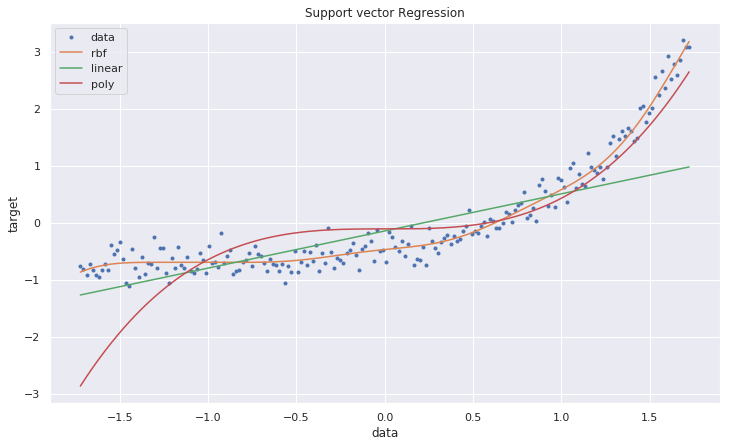

In [10]:
kernels = ['rbf', 'linear', 'poly']

# regressors
svr = []
y_pred = np.empty(shape=(len(kernels), len(y_s)))

# Feature scaler
X_scl = StandardScaler().fit_transform(X_s)
y_scl = StandardScaler().fit_transform(y_s)

# Plot
plt.figure(figsize=(12,7))
plt.plot(X_scl, y_scl, label='data', marker='.', linestyle='none')

# Reshape and array solution
y_scl = np.reshape(a=y_scl, newshape=(len(y_scl), ))
y_pred_scl = np.empty(shape=(len(kernels), len(y)))

# differents regressors
for count, kernel in enumerate(kernels):
    svr.append(SVR(kernel=kernel, C=1e3))
    y_pred_scl[count] = svr[count].fit(X_scl, y_scl).predict(X_scl)
    
    plt.plot(X_scl, y_pred_scl[count], label=kernels[count])
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support vector Regression')
plt.legend()
plt.show()

## Usando pipelines

In [11]:
from sklearn.pipeline import make_pipeline

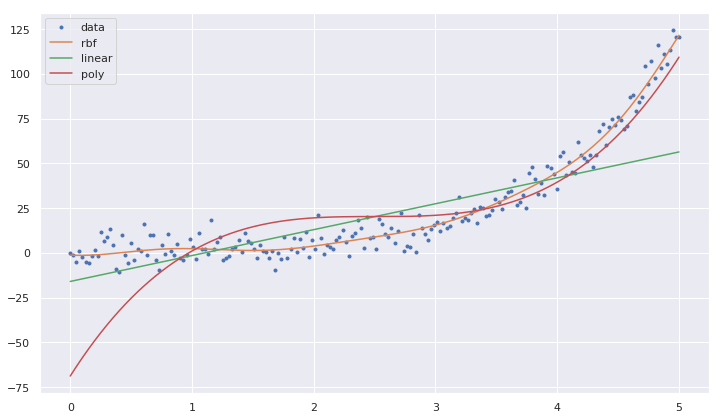

In [12]:
# Plot
plt.figure(figsize=(12,7))
plt.plot(X, y, label='data', marker='.', linestyle='none')

for kernel in kernels:
    model = make_pipeline(StandardScaler(), SVR(kernel=kernel, C=1e3))
    y_pred_2 = model.fit(X_s, y).predict(X_s)
    plt.plot(X, y_pred_2, label=kernel)

plt.legend()
plt.show()